In [0]:
import numpy as np

In [0]:
class Game2048(object):
    def __init__(self, n, dims):
        assert n > 3, "n must be greater than 3"
        assert dims > 1, "dims must be greater than 1"
        self.n = n
        self.dims = dims
        self.n_news = ((n**self.dims)//2**4)*2
        self.shape = [n for i in range(self.dims)]
        self.actions = [(dim, 0) for dim in range(self.dims)] + [(dim, 1) for dim in range(self.dims)]
        self.reset()
    
    def reset(self):
        self.board = np.zeros(shape=self.shape)
        self.next_board = np.zeros(shape=self.shape)
        self.zero_mask = np.ones(shape=self.shape)
        self.score = 0
        self.last_move = False
        self.actions_taken = []
        self.add_numbers()
    
    def add_numbers(self):
        idx_gt_zero = np.argwhere(self.board)
        np.put(self.zero_mask, np.ravel_multi_index(idx_gt_zero.T, self.shape), 0, mode='raise')
        idx_zero = np.argwhere(self.zero_mask)
        np.put(self.zero_mask, np.ravel_multi_index(idx_gt_zero.T, self.shape), 1, mode='raise')
        if idx_zero.shape[0] > self.n_news:
            insert_idx = idx_zero[np.argsort(np.random.uniform(size=idx_zero.shape[0]))[:self.n_news], :]
        elif idx_zero.shape[0] > 0 and idx_zero.shape[0] <= self.n_news:
            insert_idx = idx_zero
        else:
            self.last_move = True
            return
        np.put(self.board, np.ravel_multi_index(insert_idx.T, self.shape), 2, mode='raise')
    
    def next_move(self, action_n):
        assert action_n < self.dims * 2, 'invalid action number'
        score = self.score
        if self.last_move:
            if len(self.actions_taken) == len(self.actions):
                return None, score
            else:
                if action_n not in self.actions_taken:
                    self.actions_taken.append(action_n)
        action = self.actions[action_n]
        self.next_board = np.copy(self.board)
        it_list = zip(range(self.n-1, 0, -1), range(self.n-2, -1, -1)) if action[1] else zip(range(self.n-1), range(1,self.n))
        for i, next_i in it_list:
            index_base = np.ones(shape=[1 for x in range(self.dims)], dtype=np.int8)
            xi = np.take_along_axis(self.next_board, index_base*i, axis=action[0])
            xiplus = np.take_along_axis(self.next_board, index_base*next_i, axis=action[0])
            with np.nditer([xi, xiplus], flags=[], op_flags=[['readwrite'], ['readwrite']]) as it:
                for j, next_j in it:
                    if j[...] != 0 and next_j[...] == 0:
                        next_j[...] = j[...]
                        j[...] = 0
                    elif j[...] == next_j[...]:
                        next_j *= 2
                        j[...] = 0
                        score += next_j[...]
                        if self.last_move:
                            self.last_move = False
                            self.actions_taken = []
            np.put_along_axis(self.next_board, index_base*i, xi, axis=action[0])
            np.put_along_axis(self.next_board, index_base*next_i, xiplus, axis=action[0])
        return self.next_board, score
    
    def update_move(self, board, score):
        self.board = board
        self.score = score
        self.add_numbers()

In [0]:
def play_random(n, dims):
    game = Game2048(n=n, dims=dims)
    while 1:
        action_n = int(np.random.uniform()*len(game.actions))
        new_board, score =  game.next_move(action_n=action_n)
        if new_board is None:
            break
        game.update_move(new_board, score)
    return game.board, score

In [4]:
board, score = play_random(n=4, dims=2);
print(board, score)

[[ 8.  4.  8.  2.]
 [16.  2.  4. 16.]
 [ 8.  4.  2.  4.]
 [ 4.  2. 32.  2.]] 292.0


In [5]:
board, score = play_random(n=4, dims=3);
print(board, score)

[[[ 2.  4.  2.  4.]
  [16.  2.  8.  2.]
  [ 2.  8.  2.  8.]
  [ 4. 32. 16.  2.]]

 [[ 4.  2.  4.  2.]
  [32.  4. 16.  4.]
  [ 4.  2.  4.  2.]
  [32.  8.  2.  4.]]

 [[ 2. 16.  8.  4.]
  [16.  2.  4. 32.]
  [ 2. 64. 16.  8.]
  [ 4.  2.  4.  2.]]

 [[ 4.  8.  4.  2.]
  [32.  4.  8.  4.]
  [ 4.  8.  4.  2.]
  [16.  4.  8.  4.]]] 1544.0


In [6]:
board, score = play_random(n=4, dims=2);
print(score)

408.0


In [7]:
board, score = play_random(n=4, dims=5);
print(score)

124100.0


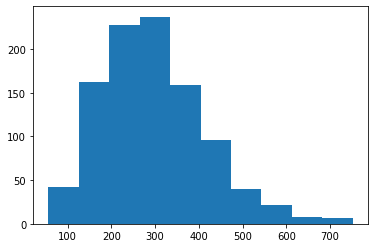

In [8]:
iterations = 1000
scores = np.zeros(shape=(iterations))
for i in range(iterations):
    _, scores[i] = play_random(4, 2)

import matplotlib.pyplot as plt
plt.hist(scores);